In [40]:
# 1. Importar bibliotecas necesarias
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [89]:
# 2. Definir rutas
data_dir = '../data/images'
labels_path = '../data/labels.csv'

In [141]:
df = pd.read_csv(labels_path)
print(df.head())
# 4. Eliminar filas con valores nulos en la columna 'category'
df = df.dropna(subset=['Category'])
df.head()
df.info()
df

   Unnamed: 0  Image    Category
0         NaN      0  NEUTROPHIL
1         NaN      1  NEUTROPHIL
2         NaN      2  NEUTROPHIL
3         NaN      3  NEUTROPHIL
4         NaN      4  NEUTROPHIL
<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 410
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Image       367 non-null    int64  
 2   Category    367 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 11.5+ KB


,Unnamed: 0,Image,Category
0,NaN,0,NEUTROPHIL
1,NaN,1,NEUTROPHIL
2,NaN,2,NEUTROPHIL
3,NaN,3,NEUTROPHIL
4,NaN,4,NEUTROPHIL
...,...,...,...
405,NaN,405,NEUTROPHIL
407,NaN,407,NEUTROPHIL
408,NaN,408,NEUTROPHIL
409,NaN,409,NEUTROPHIL


In [143]:
df['filename'] = df['Image'].apply(lambda x: f"BloodImage_{int(x):05d}.jpg")
df

,Unnamed: 0,Image,Category,filename
0,NaN,0,NEUTROPHIL,BloodImage_00000.jpg
1,NaN,1,NEUTROPHIL,BloodImage_00001.jpg
2,NaN,2,NEUTROPHIL,BloodImage_00002.jpg
3,NaN,3,NEUTROPHIL,BloodImage_00003.jpg
4,NaN,4,NEUTROPHIL,BloodImage_00004.jpg
...,...,...,...,...
405,NaN,405,NEUTROPHIL,BloodImage_00405.jpg
407,NaN,407,NEUTROPHIL,BloodImage_00407.jpg
408,NaN,408,NEUTROPHIL,BloodImage_00408.jpg
409,NaN,409,NEUTROPHIL,BloodImage_00409.jpg


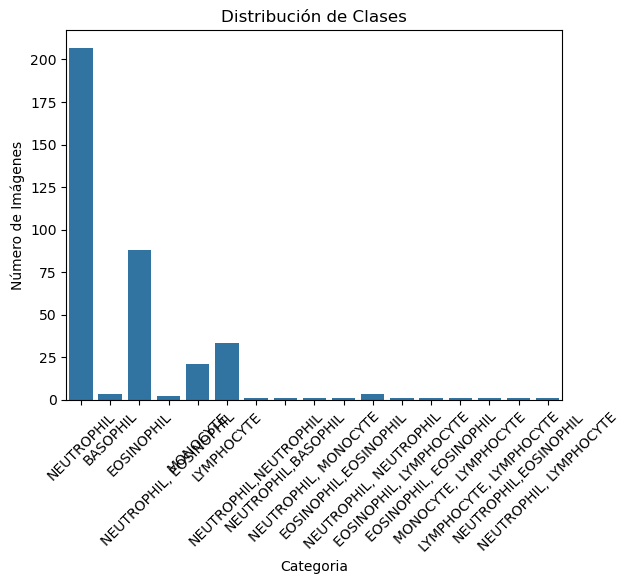

In [145]:
# 4. Visualizar distribución de clases
sns.countplot(x='Category', data=df)
plt.title('Distribución de Clases')
plt.xlabel('Categoria')
plt.ylabel('Número de Imágenes')
plt.xticks(rotation=45)
plt.show()

In [146]:
# Verificar valores nulos
print(df.isnull().sum())

Unnamed: 0    367
Image           0
Category        0
filename        0
dtype: int64


In [149]:
df['Category'].value_counts()

Category
NEUTROPHIL                207
EOSINOPHIL                 88
LYMPHOCYTE                 33
MONOCYTE                   21
BASOPHIL                    3
NEUTROPHIL, NEUTROPHIL      3
NEUTROPHIL, EOSINOPHIL      2
NEUTROPHIL,BASOPHIL         1
NEUTROPHIL,NEUTROPHIL       1
NEUTROPHIL, MONOCYTE        1
EOSINOPHIL,EOSINOPHIL       1
EOSINOPHIL, LYMPHOCYTE      1
EOSINOPHIL, EOSINOPHIL      1
MONOCYTE, LYMPHOCYTE        1
LYMPHOCYTE, LYMPHOCYTE      1
NEUTROPHIL,EOSINOPHIL       1
NEUTROPHIL, LYMPHOCYTE      1
Name: count, dtype: int64

In [151]:
df = df[~df['Category'].str.contains(',')].copy()

In [153]:
df['Category'].value_counts()

Category
NEUTROPHIL    207
EOSINOPHIL     88
LYMPHOCYTE     33
MONOCYTE       21
BASOPHIL        3
Name: count, dtype: int64

In [155]:
df = df.drop ('Unnamed: 0', axis = 1)
df

,Image,Category,filename
0,0,NEUTROPHIL,BloodImage_00000.jpg
1,1,NEUTROPHIL,BloodImage_00001.jpg
2,2,NEUTROPHIL,BloodImage_00002.jpg
3,3,NEUTROPHIL,BloodImage_00003.jpg
4,4,NEUTROPHIL,BloodImage_00004.jpg
...,...,...,...
405,405,NEUTROPHIL,BloodImage_00405.jpg
407,407,NEUTROPHIL,BloodImage_00407.jpg
408,408,NEUTROPHIL,BloodImage_00408.jpg
409,409,NEUTROPHIL,BloodImage_00409.jpg


In [157]:
#puesto que la Imagen 280,116 no existe se borro esta columna
df = df.drop(index=280, axis=0)
df = df.drop(index=116, axis=0)
df

,Image,Category,filename
0,0,NEUTROPHIL,BloodImage_00000.jpg
1,1,NEUTROPHIL,BloodImage_00001.jpg
2,2,NEUTROPHIL,BloodImage_00002.jpg
3,3,NEUTROPHIL,BloodImage_00003.jpg
4,4,NEUTROPHIL,BloodImage_00004.jpg
...,...,...,...
405,405,NEUTROPHIL,BloodImage_00405.jpg
407,407,NEUTROPHIL,BloodImage_00407.jpg
408,408,NEUTROPHIL,BloodImage_00408.jpg
409,409,NEUTROPHIL,BloodImage_00409.jpg


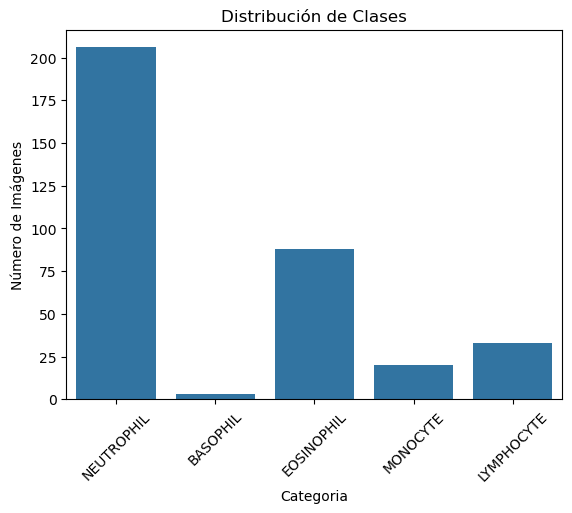

In [159]:
# 4. Visualizar distribución de clases
sns.countplot(x='Category', data=df)
plt.title('Distribución de Clases')
plt.xlabel('Categoria')
plt.ylabel('Número de Imágenes')
plt.xticks(rotation=45)
plt.show()

In [161]:
df.to_csv("../artifacts/clean_labels.csv", index=False)

In [165]:
df['Category'].value_counts()

Category
NEUTROPHIL    206
EOSINOPHIL     88
LYMPHOCYTE     33
MONOCYTE       20
BASOPHIL        3
Name: count, dtype: int64